<a href="https://www.kaggle.com/code/khushiketanbhaishah/edasalesportfolio?scriptVersionId=177838559" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salesportfolioeda/ItemsWithWhoseSalePrice.csv
/kaggle/input/salesportfolioeda/ItemDetails.csv
/kaggle/input/salesportfolioeda/Sales1.csv


In [2]:
Salesdf=pd.read_csv('/kaggle/input/salesportfolioeda/Sales1.csv')
Itemdetailsdf=pd.read_csv('/kaggle/input/salesportfolioeda/ItemDetails.csv')
WholeSalePricedf=pd.read_csv('/kaggle/input/salesportfolioeda/ItemsWithWhoseSalePrice.csv')

In [3]:
Salesdf

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No
...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,sale,No
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,sale,No
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,sale,No
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,sale,No


In [4]:
WholeSalePricedf

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03
...,...,...,...
55977,2023-06-30,102900051000944,18.00
55978,2023-06-30,102900051004294,6.45
55979,2023-06-30,102900051010455,4.48
55980,2023-06-30,106949711300259,1.45


In [5]:
Itemdetailsdf

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables
...,...,...,...,...
246,106958851400125,Haixian Mushroom (Bag) (4),1011010801,Edible Mushroom
247,106971533450003,Haixian Mushroom (Bunch),1011010801,Edible Mushroom
248,106971533455008,Haixian Mushroom (Bag) (3),1011010801,Edible Mushroom
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),1011010801,Edible Mushroom


In [6]:
WholeSalePricedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      55982 non-null  object 
 1   Item Code                 55982 non-null  int64  
 2   Wholesale Price (RMB/kg)  55982 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
Salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 46.9+ MB


In [8]:
Itemdetailsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [9]:
Salesdf['Item Code']=Salesdf['Item Code'].astype('str')
Salesdf['Date']=pd.to_datetime(Salesdf['Date'])
Salesdf.dtypes
#Salesdf.info()

Date                           datetime64[ns]
Time                                   object
Item Code                              object
Quantity Sold (kilo)                  float64
Unit Selling Price (RMB/kg)           float64
Sale or Return                         object
Discount (Yes/No)                      object
dtype: object

In [10]:
Itemdetailsdf['Item Code']=Itemdetailsdf['Item Code'].astype('str')
Itemdetailsdf['Category Code']=Itemdetailsdf['Category Code'].astype('str')
Itemdetailsdf.dtypes

Item Code        object
Item Name        object
Category Code    object
Category Name    object
dtype: object

In [11]:
WholeSalePricedf['Item Code']=WholeSalePricedf['Item Code'].astype('str')
WholeSalePricedf['Date']=pd.to_datetime(WholeSalePricedf['Date'])
WholeSalePricedf.dtypes

Date                        datetime64[ns]
Item Code                           object
Wholesale Price (RMB/kg)           float64
dtype: object

In [12]:
#DataCleaning

In [13]:
Salesdf.isnull().sum()

Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64

In [14]:
WholeSalePricedf.isnull().sum()

Date                        0
Item Code                   0
Wholesale Price (RMB/kg)    0
dtype: int64

In [15]:
Itemdetailsdf.isnull().sum()

Item Code        0
Item Name        0
Category Code    0
Category Name    0
dtype: int64

In [16]:
#data exploration

In [17]:
SalesInnerItemdetailsdf = pd.merge(Salesdf,Itemdetailsdf,on='Item Code' , how='inner')
SalesInnerItemdetailsdf

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,1011010101,Flower/Leaf Vegetables
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,1011010101,Flower/Leaf Vegetables
...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,sale,No,Xixia Black Mushroom (1),1011010801,Edible Mushroom
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,sale,No,Changxianqie,1011010501,Solanum
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,sale,No,Xixia Black Mushroom (1),1011010801,Edible Mushroom
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,sale,No,Wuhu Green Pepper (1),1011010504,Capsicum


In [18]:
#Details of item for which discount is given
ResultDF=SalesInnerItemdetailsdf[SalesInnerItemdetailsdf['Discount (Yes/No)']=='Yes']
ResultDF=ResultDF[['Item Name', 'Item Code', 'Category Name']]
ResultDF=ResultDF.drop_duplicates(subset=['Item Name'])
ResultDF=ResultDF.sort_values(by='Item Name')
ResultDF

,Item Name,Item Code,Category Name
10777,7 Colour Pepper (1),102900005117209,Capsicum
551892,7 Colour Pepper (2),102900011032343,Capsicum
501558,7 Colour Pepper (Bag),102900011031735,Capsicum
515776,Agaricus Bisporus (Bag),102900011031841,Edible Mushroom
574293,Agaricus Bisporus (Box),102900011034330,Edible Mushroom
...,...,...,...
592821,Zhijiang Qinggengsanhua,102900011034026,Cabbage
161526,Zhijiang Red Bolt,102900005122654,Flower/Leaf Vegetables
475821,Zhijiang Red Bolt (Bag),102900011030042,Flower/Leaf Vegetables
2794,Zhuyecai,102900005115786,Flower/Leaf Vegetables


In [19]:
#Number of orders that are either returned or sold
Resultdf2=Salesdf.groupby(by='Sale or Return').count().reset_index()
Resultdf2.loc[:,['Sale or Return','Item Code']]

,Sale or Return,Item Code
0,return,461
1,sale,878042


In [20]:
#List of items that are returned
#Resultdf3=
SalesInnerItemdetailsdf.loc[SalesInnerItemdetailsdf['Sale or Return']=='return',['Item Code','Item Name']].drop_duplicates()

,Item Code,Item Name
357,102900005116714,Broccoli
2929,102900005118831,Wawacai
11434,102900011008522,Sweet Chinese Cabbage
12890,102900005117056,Paopaojiao (Jingpin)
15834,102900005115984,Yunnan Lettuces
...,...,...
814624,102900005118824,High Melon (1)
814625,102900005115199,Sichuan Red Cedar
817692,106971533455008,Haixian Mushroom (Bag) (3)
831216,102900011010891,Wild Lotus Root (1)


In [21]:
#List of items that are returned along with number of times which has been returned (frequency of return) more than or equal to 10 times
Resultdf4=SalesInnerItemdetailsdf.loc[SalesInnerItemdetailsdf['Sale or Return']=='return']
Resultdf4=Resultdf4.groupby(by='Item Code').size().reset_index(name='Cnt')
Resultdf4[Resultdf4['Cnt']>=10]

,Item Code,Cnt
3,102900005115779,10
4,102900005115786,14
17,102900005116257,10
19,102900005116530,34
22,102900005116714,36
25,102900005116899,22
30,102900005118831,18
49,102900011016701,38
56,102900011030059,10
62,102900011031100,13


In [22]:
#3rd highest top selling product in terms of revenue
#SalesInnerItemdetailsdf.info()
#SalesInnerItemdetailsdf=SalesInnerItemdetailsdf[SalesInnerItemdetailsdf['Sale or Return']!='return']
SalesInnerItemdetailsdf=SalesInnerItemdetailsdf.assign(SellingPrice=lambda x: (x['Quantity Sold (kilo)']*x['Unit Selling Price (RMB/kg)']))
Resultdf5=SalesInnerItemdetailsdf.groupby('Item Code')['SellingPrice'].sum().reset_index()
Resultdf5['rank']=Resultdf5['SellingPrice'].rank(method='dense', ascending=True)
#Resultdf5.sort_values(by='rank',ascending=False)
Resultdf5[Resultdf5['rank']==3]

,Item Code,SellingPrice,rank
220,102900051000890,6.71,3.0


In [23]:
#Revenue generated per year
Resultdf6=SalesInnerItemdetailsdf
Resultdf6['Year']=Resultdf6['Date'].dt.year
Resultdf6.groupby('Year')['SellingPrice'].sum().reset_index()
#SalesInnerItemdetailsdf

,Year,SellingPrice
0,2020,6.695293e+05
1,2021,1.100363e+06
2,2022,1.036772e+06
3,2023,5.631021e+05


In [24]:
#profit per category per year
SalesInnerItemdetailsInnerWholeSale = pd.merge(SalesInnerItemdetailsdf, WholeSalePricedf, on =['Item Code','Date'] , how='inner')
SalesInnerItemdetailsInnerWholeSale=SalesInnerItemdetailsInnerWholeSale.assign(CostPrice = lambda x: (x['Quantity Sold (kilo)']*x['Wholesale Price (RMB/kg)']))
SalesInnerItemdetailsInnerWholeSale=SalesInnerItemdetailsInnerWholeSale.assign(Profit = lambda x: (x['SellingPrice']-x['CostPrice']))
Resultdf7=SalesInnerItemdetailsInnerWholeSale.groupby(by=['Category Name','Year'])['Profit'].sum().reset_index()
pd.options.display.float_format = '{:.5f}'.format
Resultdf7

,Category Name,Year,Profit
0,Aquatic Tuberous Vegetables,2020,15228.69997
1,Aquatic Tuberous Vegetables,2021,34749.25826
2,Aquatic Tuberous Vegetables,2022,41787.04172
3,Aquatic Tuberous Vegetables,2023,16093.02888
4,Cabbage,2020,30220.04500
5,Cabbage,2021,36839.68576
6,Cabbage,2022,44912.71270
7,Cabbage,2023,18930.22409
8,Capsicum,2020,43375.26149
9,Capsicum,2021,81352.25352


In [25]:
#profit per category per year pivot
pivot = Resultdf7.pivot(index=['Category Name'],columns=['Year'],values=['Profit' ])
pivot

Profit                                      
Year                               2020         2021         2022        2023
Category Name                                                                
Aquatic Tuberous Vegetables 15228.69997  34749.25826  41787.04172 16093.02888
Cabbage                     30220.04500  36839.68576  44912.71270 18930.22409
Capsicum                    43375.26149  81352.25352  95693.95248 59103.13699
Edible Mushroom             52640.07345  73836.08206  62286.69638 36996.63747
Flower/Leaf Vegetables      94345.99102 140744.01468 131768.91537 63369.19191
Solanum                     12582.59561  22342.24016  21745.56654 12708.97605

In [61]:
#Data Visualization

#profit per year
df=SalesInnerItemdetailsInnerWholeSale.groupby('Year')['Profit'].sum().reset_index()
#df.set_index('Year')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    4 non-null      int32  
 1   Profit  4 non-null      float64
dtypes: float64(1), int32(1)
memory usage: 176.0 bytes


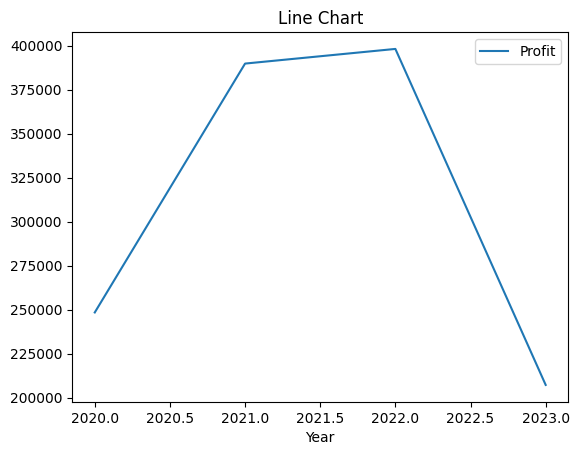

In [62]:
df.plot(x="Year", y="Profit") 
#plt.xlabel("Year")
#plt.ylabel("Profit")
plt.title("Line Chart")
plt.show()

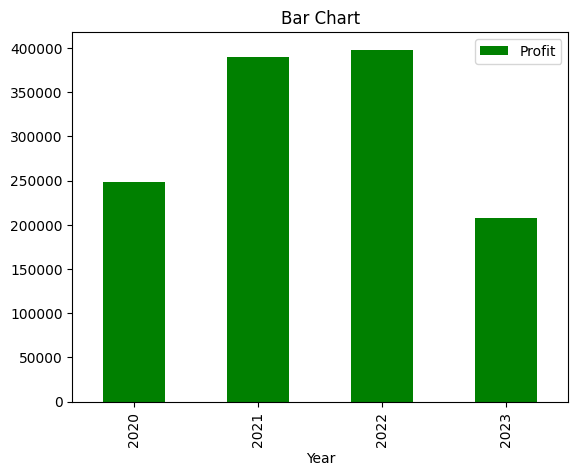

In [63]:
df.plot(kind="bar",x="Year", y="Profit",color="Green")  
#plt.xlabel("Year")
#plt.ylabel("Profit")
plt.title("Bar Chart")
plt.show()

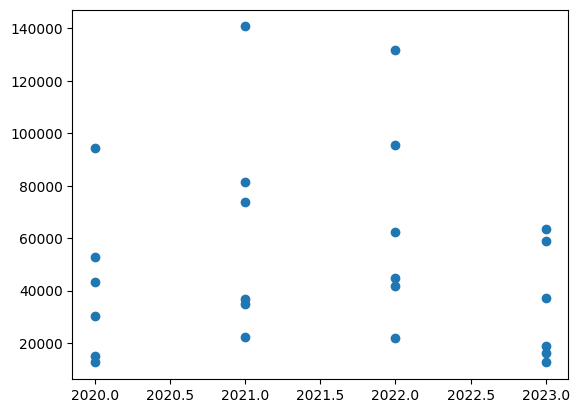

In [69]:
#pivot.reset_index()
#Resultdf7
plt.scatter(Resultdf7["Year"], Resultdf7["Profit"]) 
plt.show() 

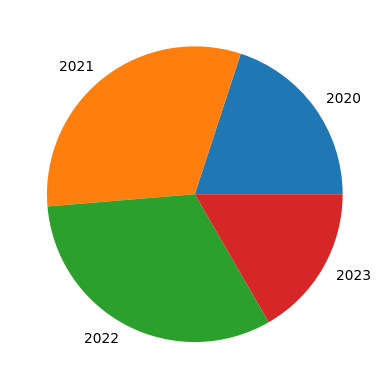

In [70]:
plt.pie(df["Profit"], labels=df["Year"]) 
plt.show() 